In [27]:
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data


(X_train, y_train), (X_test, y_test) = load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [28]:
X_train.shape


(60000, 28, 28)

7

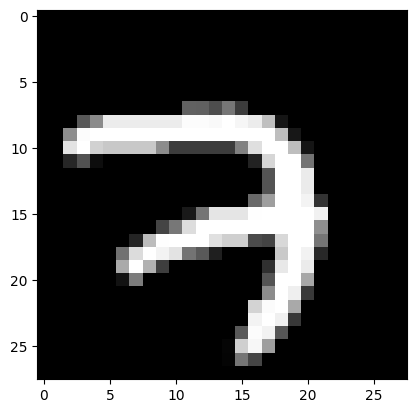

In [29]:
plt.imshow(X_train[5000], cmap='gray')
y_train[5000]

In [30]:
# 2d image for index 5000 - it contains 28x28
X_train [5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [31]:
X_train[5000].min(), X_train[5000].max()

(0, 254)

In [32]:
# pixel values at row 10, column 5 for image 5000
X_train[5000, 10, 5]

199

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

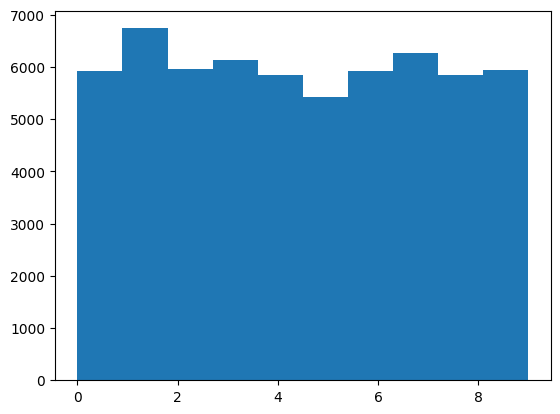

In [35]:
plt.hist(y_train)

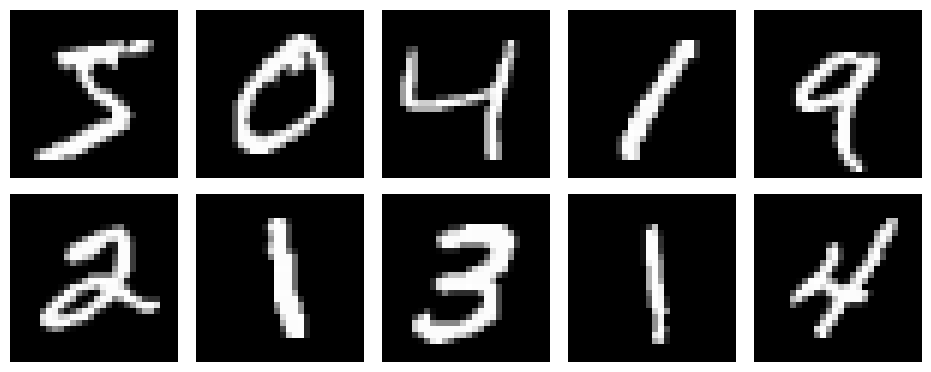

In [36]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(X_train)

# Normalize data

In [37]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

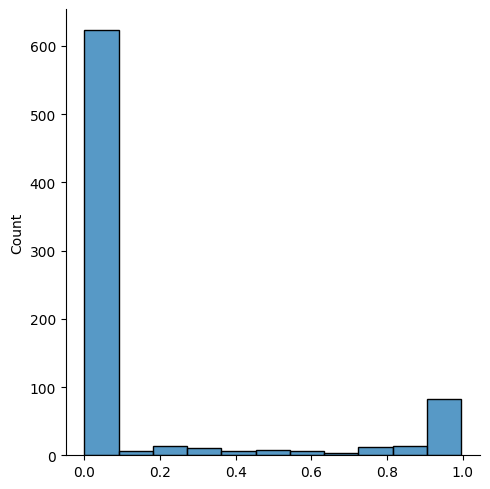

In [38]:
import seaborn as sns

sns.displot(data=X_train[5000].reshape(-1), kind="hist")

## MLP model

- 10 output neurons/nodes (which represents 0,1,2,3....,9)
- softmax activation function in output layer -> probabilities 
- 784 neurons for input layer(28x28) - why? since we use flatten layer on the input which now is 28x28 - why? 
- hidden layers -> dense, why?  



In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

c:\Users\Noah7\code\Github\AI-Noah-Eliasson-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_naive.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7947 - loss: 0.7813 - val_accuracy: 0.9170 - val_loss: 0.3069
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9108 - loss: 0.3216 - val_accuracy: 0.9231 - val_loss: 0.2778
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9177 - loss: 0.2955 - val_accuracy: 0.9252 - val_loss: 0.2679
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9212 - loss: 0.2802 - val_accuracy: 0.9253 - val_loss: 0.2636
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2794 - val_accuracy: 0.9299 - val_loss: 0.2559
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2624 - val_accuracy: 0.9295 - val_loss: 0.2560
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9273 - loss: 0.2633 - val_accuracy: 0.9298 - val_loss: 0.2558
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9280 - loss: 0.2601 - 

In [41]:
import pandas as pd
naive_histroy = pd.DataFrame(model_naive.history.history)
naive_histroy.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86930,0.503017,0.9170,0.306914
1,0.91192,0.315405,0.9231,0.277751
2,0.91794,0.292496,0.9252,0.267887
3,0.92240,0.280368,0.9253,0.263577
4,0.92322,0.273373,0.9299,0.255877


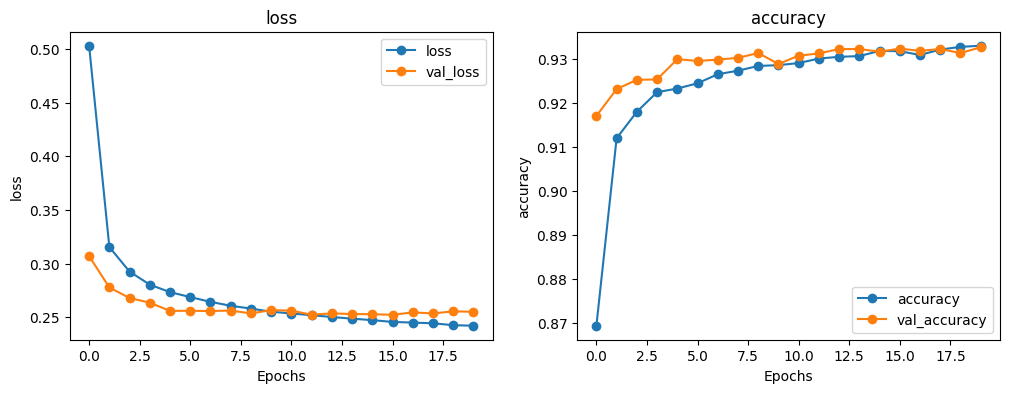

In [42]:
def plot_metric(df_history, style="-o"):
    _, axes = plt.subplots(1,2,figsize=(12,4))
    metrics=[["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs", 
            ylabel=metric[0], 
            title=metric[0], 
            ax=ax, 
            style=style
        )

plot_metric(naive_histroy)

## add hidden layers

In [43]:
model_naive.summary() # we see in the summary that we have no hidden layers only input layer and output layer

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

In [44]:
model_deep = mlp_model(neurons=[128, 128, 10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"])
model_deep.summary()

c:\Users\Noah7\code\Github\AI-Noah-Eliasson-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_deep.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8719 - loss: 0.4406 - val_accuracy: 0.9648 - val_loss: 0.1267
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9660 - loss: 0.1083 - val_accuracy: 0.9682 - val_loss: 0.1037
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0669 - val_accuracy: 0.9723 - val_loss: 0.0929
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0511 - val_accuracy: 0.9743 - val_loss: 0.0900
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9875 - loss: 0.0392 - val_accuracy: 0.9737 - val_loss: 0.0973
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9890 - loss: 0.0318 - val_accuracy: 0.9733 - val_loss: 0.0973
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9904 - loss: 0.0283 - val_accuracy: 0.9767 - val_loss: 0.0951
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0211 - 

In [46]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92674,0.248527,0.9648,0.126729
1,0.96740,0.104771,0.9682,0.103715
2,0.97762,0.070915,0.9723,0.092921
3,0.98310,0.053334,0.9743,0.090005
4,0.98608,0.042731,0.9737,0.097332


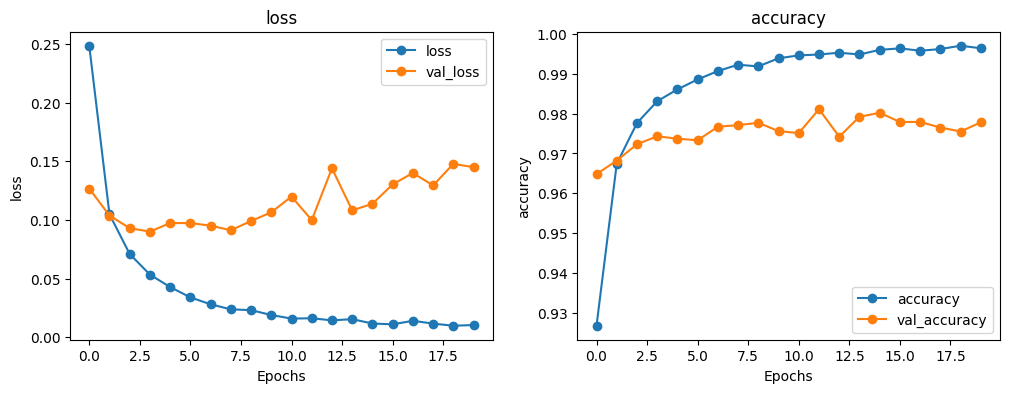

In [47]:
plot_metric(deep_history)

In [48]:
# trains on all training data, we do not use validation split 1 / 6 -> 10000 val 
model_deep.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0338
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0125
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0094


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.15676110e-17, 2.03343092e-15, 1.01952055e-16, ...,
        1.00000000e+00, 6.41153315e-20, 4.44679795e-14],
       [1.68855361e-23, 1.04793463e-12, 1.00000000e+00, ...,
        3.78781357e-19, 7.91903324e-19, 8.70866641e-29],
       [1.22577807e-11, 9.99998689e-01, 5.32301647e-10, ...,
        1.33076844e-06, 8.31805513e-10, 9.66033135e-13],
       ...,
       [7.23041556e-26, 7.51484243e-15, 1.07649547e-24, ...,
        2.34132352e-10, 1.15666495e-18, 3.71461840e-13],
       [1.37718841e-18, 1.51233204e-18, 1.67122812e-20, ...,
        5.87260309e-15, 9.84849446e-09, 4.06990993e-17],
       [9.04330197e-19, 1.30000623e-19, 3.85037909e-22, ...,
        1.37514159e-25, 6.78686801e-15, 8.18906141e-21]], dtype=float32)

In [50]:
y_pred[0]# 7th index is 100% 

array([3.15676110e-17, 2.03343092e-15, 1.01952055e-16, 2.18101944e-16,
       1.57532193e-16, 1.08039921e-17, 2.11251231e-25, 1.00000000e+00,
       6.41153315e-20, 4.44679795e-14], dtype=float32)

In [51]:
y_test[0]

7

In [52]:
y_pred[12]

array([2.3450514e-21, 1.3449741e-16, 5.9824614e-18, 7.9725185e-11,
       8.9679547e-10, 1.4558908e-15, 4.1941470e-21, 4.1804649e-10,
       6.0694369e-13, 1.0000000e+00], dtype=float32)

In [53]:
y_test[12]

9

In [54]:
y_pred.shape

(10000, 10)

In [55]:
y_pred = np.argmax(y_pred, axis=1)

In [58]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99       994\n           1       0.99      0.99      0.99      1133\n           2       0.98      0.98      0.98      1030\n           3       0.98      0.95      0.97      1044\n           4       0.98      0.99      0.98       973\n           5       0.95      0.99      0.97       860\n           6       0.98      0.98      0.98       955\n           7       0.98      0.97      0.97      1032\n           8       0.97      0.97      0.97       969\n           9       0.97      0.97      0.97      1010\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'

## Some misclassifications

In [59]:
np.where(y_pred != y_test)

(array([  18,  104,  115,  149,  151,  247,  266,  321,  340,  435,  445,
         495,  543,  582,  619,  646,  659,  684,  720,  797,  844,  877,
         882,  883,  924,  947,  951,  965, 1003, 1014, 1039, 1112, 1156,
        1178, 1182, 1226, 1242, 1247, 1319, 1328, 1364, 1378, 1393, 1395,
        1522, 1527, 1530, 1549, 1553, 1641, 1670, 1681, 1709, 1717, 1722,
        1751, 1754, 1790, 1878, 1901, 1911, 1941, 1981, 2004, 2024, 2043,
        2044, 2070, 2073, 2098, 2109, 2130, 2135, 2162, 2168, 2182, 2224,
        2237, 2266, 2272, 2280, 2293, 2299, 2369, 2422, 2526, 2582, 2597,
        2648, 2654, 2743, 2771, 2877, 2915, 2921, 2939, 2945, 2953, 3117,
        3225, 3284, 3289, 3333, 3422, 3475, 3520, 3558, 3597, 3702, 3776,
        3780, 3808, 3811, 3853, 3876, 3893, 3902, 3906, 3943, 3946, 4065,
        4078, 4093, 4140, 4156, 4163, 4176, 4199, 4201, 4248, 4289, 4294,
        4300, 4306, 4313, 4315, 4321, 4360, 4433, 4497, 4504, 4505, 4551,
        4690, 4731, 4740, 4761, 4807, 

In [66]:
misclassified_indeces = np.where(y_pred != y_test)
misclassified_indeces[:10]

(array([  18,  104,  115,  149,  151,  247,  266,  321,  340,  435,  445,
         495,  543,  582,  619,  646,  659,  684,  720,  797,  844,  877,
         882,  883,  924,  947,  951,  965, 1003, 1014, 1039, 1112, 1156,
        1178, 1182, 1226, 1242, 1247, 1319, 1328, 1364, 1378, 1393, 1395,
        1522, 1527, 1530, 1549, 1553, 1641, 1670, 1681, 1709, 1717, 1722,
        1751, 1754, 1790, 1878, 1901, 1911, 1941, 1981, 2004, 2024, 2043,
        2044, 2070, 2073, 2098, 2109, 2130, 2135, 2162, 2168, 2182, 2224,
        2237, 2266, 2272, 2280, 2293, 2299, 2369, 2422, 2526, 2582, 2597,
        2648, 2654, 2743, 2771, 2877, 2915, 2921, 2939, 2945, 2953, 3117,
        3225, 3284, 3289, 3333, 3422, 3475, 3520, 3558, 3597, 3702, 3776,
        3780, 3808, 3811, 3853, 3876, 3893, 3902, 3906, 3943, 3946, 4065,
        4078, 4093, 4140, 4156, 4163, 4176, 4199, 4201, 4248, 4289, 4294,
        4300, 4306, 4313, 4315, 4321, 4360, 4433, 4497, 4504, 4505, 4551,
        4690, 4731, 4740, 4761, 4807, 

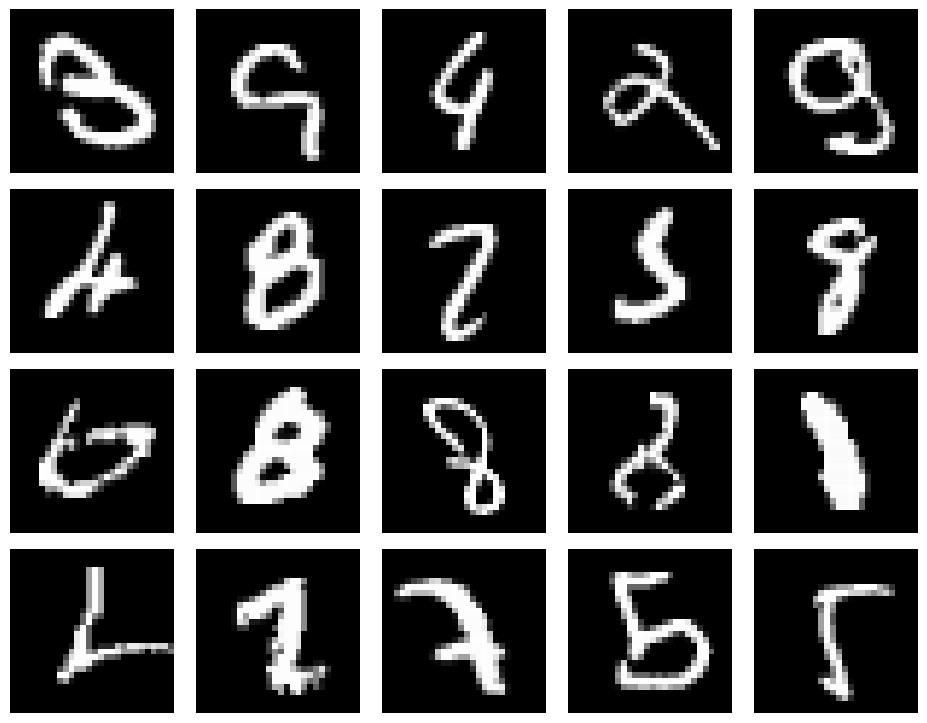

In [68]:
display_images(X_test[misclassified_indeces], 4, 5, (12,8))